<a href="https://colab.research.google.com/github/emanuel379/Estatistica-I/blob/main/auxlista6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as sss
import numpy as np


In [ ]:
## probab de obter 60 sucessos numa amostra de 100 elementos, sendo cada elemento uma Bernoulli (p=0.5)
pvalorbinom=1-sss.binom.cdf(60,100,0.5)
print(pvalorbinom)

0.01760010010885238


In [ ]:
##exo 3a
desvioX=10
nn=50
## calculamos o p-valor de H0 e de Ha (mas o de Ha não se usa)
pvalorH0=sss.norm.cdf(15.2,18,desvioX/np.sqrt(nn))
pvalorHa=1-sss.norm.cdf(15.2,13,desvioX/np.sqrt(nn))
print(pvalorH0,pvalorHa)

0.02385744011867555 0.05989746521295913


In [ ]:
## caso bilateral (Ha é que mu é distinto de 18)
pvalorbil=sss.norm.cdf(15.2,18,desvioX/np.sqrt(nn))+1-sss.norm.cdf(20.8,18,desvioX/np.sqrt(nn))
print(pvalorbil)

0.04771488023735104


In [ ]:
## peso medio de 50 passageiros é 200,
## queremos testar a hipótese de que o peso médio populacional é 195, com variancia de 100
## isto é um "z-test"
## unilateral: testar se aumentou
pvalornormal=1-sss.norm.cdf(200,195,np.sqrt(100/50))
print(pvalornormal)
#bilateral
pvalornormalbil=1-sss.norm.cdf(200,195,np.sqrt(100/50))+sss.norm.cdf(190,195,np.sqrt(100/50))
print(pvalornormalbil)

0.00020347600872250293
0.00040695201744498234


Proporção do rebanho com verminose.

In [ ]:
## p-valor
## isto aquií é um teste binomial
theta=0.1
n=100
vobs=8
pvalue=sss.binom.cdf(vobs,n,theta)
print(pvalue)

0.3208738883628403


In [ ]:
## podemos usar a função que realiza o test, obtendo o mesmo resultado
sss.binomtest(vobs,n,p=theta,alternative='less')

BinomTestResult(k=8, n=100, alternative='less', proportion_estimate=0.08, pvalue=0.3208738883628403)

Aproximando por normal

In [ ]:
pvalue2=sss.norm.cdf(vobs,theta*n,np.sqrt(theta*(1-theta)*n))
print(pvalue2)
print((vobs/n-theta)/np.sqrt(theta*(1-theta)/n))

0.25249253754692297
-0.6666666666666667


Pontos de um exame de inglês

DescribeResult(nobs=10, minmax=(59, 86), mean=75.7, variance=74.67777777777778, skewness=-0.6758342069252118, kurtosis=-0.5484422474612001)
10
75.7
74.67777777777778
-1.5735217944702773
0.07502463015017978


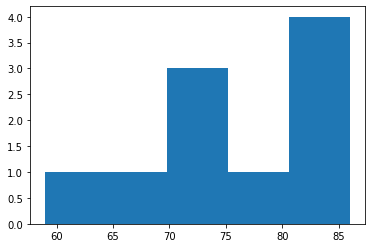

In [ ]:
## p-valor a partir de teste de média com variância desconhecida
df=np.array([65, 74, 78, 86, 59,84, 75, 72, 81, 83])
print(sss.describe(df))
theta=80
nn=len(df)
print(nn)
thetaobs=df.mean()
print(thetaobs)
estimvar=np.var(df,ddof=1)
print(estimvar)
## corresponde fazer um t-test porque a variância da população é desconhecida e deve ser estimada a partir da amostra
tobs=(thetaobs-theta)/(np.sqrt(estimvar/nn))
## tobs tem distribuiçao t com n-1 graus de liberdade
print(tobs)
pvaluet1=sss.t.cdf(tobs,nn-1)
print(pvaluet1)
plt.hist(df,5)
plt.show()


In [ ]:
## o anterior está implementado na função ttest_1samp (ver que o p-valor é igual)
sss.ttest_1samp(df,popmean=80,alternative='less')

Ttest_1sampResult(statistic=-1.5735217944702773, pvalue=0.07502463015017978)

In [ ]:
pvalue3=sss.norm.cdf(tobs,0,1) ##aproximando pela normal (o p-value obtido é diferente, só se a amostra e bem grande coincidem)
print(pvalue3)
pvalue4=sss.norm.cdf(thetaobs,theta,np.sqrt(estimvar/nn))
print(pvalue4)
pvalue5=sss.norm.cdf(df.mean(),theta,np.std(df,ddof=1)/np.sqrt(nn))
print(pvalue5)

0.057799022922622775
0.057799022922622775
0.057799022922622775


Podemos gerar valores com distribuição normal de media 80 e ver se a média é mais extrema que 75.7 (nesse caso mais extrema significa MENOR, já que a hipótese sendo testada é que "a média valia 80 e diminuiu")

[ 85.52087141  87.23230513  77.7987692   77.13365375  93.4492042
  89.01893098 101.46188042  81.7104567   76.91068266  87.86376527]
DescribeResult(nobs=10, minmax=(76.91068266471007, 101.46188042378999), mean=85.81005197266265, variance=61.71371624106929, skewness=0.5758542223758452, kurtosis=-0.41034515309769537)


(array([4., 1., 3., 1., 1.]),
 array([ 76.91068266,  81.82092222,  86.73116177,  91.64140132,
         96.55164087, 101.46188042]),
 <a list of 5 Patch objects>)

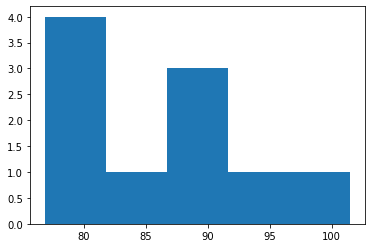

In [ ]:
dfsintetico=np.random.normal(80,np.sqrt(75),10) ##precisamos dizer a variancia dos dados sinteticos
print(dfsintetico)
print(sss.describe(dfsintetico))
## a média deveria ser menor que 75.7 um 7.5% das vezes (vai depender da variancia)
## podemos ver o histograma do dado sintetico para comparar com o do dado real (e verificar normalidade)
plt.hist(dfsintetico,5)

In [ ]:
cont=0
for kk in range(100000):
  dfsintetico=np.random.normal(80,np.sqrt(90),10) ##precisamos dizer a variancia dos dados sinteticos
                    ## quanto meor a variancia especificada, menor a probabilidade da meia < 75.7
  if dfsintetico.mean() < 75.7:
    cont=cont+1

print(cont,kk,cont/(kk+1))

7608 99999 0.07608


Médias de 50 clientes foram 62 e 71 (gasto em compras). O desvio padrão é 20 unidades. H0: médias iguais

In [ ]:
z=(62-71)/(20*np.sqrt(2/50))
print(z)
pvaluez=sss.norm.cdf(z)*2
print(pvaluez)

-2.25
0.02444894531008939


In [ ]:
## verificando por simulaçao
cont=0
for kk in range(100000):
  dfsintetico1=np.random.normal(0,20,50) ##colocamos media zero em ambos
  dfsintetico2=np.random.normal(0,20,50)
  if abs(dfsintetico1.mean()-dfsintetico2.mean()) > abs(62-71):
    cont=cont+1

print(cont,kk,cont/(kk+1))

2484 99999 0.02484


Tipo X e tipo Y de concreto

In [ ]:
dfx=np.array([54, 55, 58, 50, 61])
print(dfx.mean(),np.std(dfx,ddof=1))
dfy=np.array([51, 54, 55, 52, 53])
print(dfy.mean(),np.std(dfy,ddof=1))
## teste de comparação de médias com duas amostras (não assumimos que as variâncias sejam iguais)
sss.ttest_ind(dfx,dfy,alternative='greater',equal_var=False)

55.6 4.159326868617084
53.0 1.5811388300841898


Ttest_indResult(statistic=1.3065491598369765, pvalue=0.1234239912084517)

In [ ]:
sss.ttest_ind(dfx,dfy,alternative='greater',equal_var=True)


Ttest_indResult(statistic=1.3065491598369765, pvalue=0.11383696170651378)